#Logistic Regression from Scratch

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sopt
from sklearn import datasets

In [29]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [30]:
def logistic_model(Theta, X):
  z = np.array(Theta[0]*np.array(X[:,0]) + Theta[1]*np.array(X[:,1]) + Theta[2]*np.array(X[:,2]))
  return sigmoid(z)

In [31]:
#Negative log likelihood
def negative_log(Theta, X, y):
  y_pred = logistic_model(Theta, X)
  #Taking first derivative
  return -1 * sum(np.dot(y.T,np.log(y_pred)),np.dot(1-y.T,np.log(1-y_pred)))

In [32]:
#Getting gradient
def gradient(Theta, X, y):
  grad = X.T @ (sigmoid(X @ Theta) - y)
  return grad

In [33]:
def logistic_regression(Theta, X, y):
  ThetaR = Theta.reshape(X.shape[1], 1)
  nll = negative_log(Theta, X, y)
  grad = gradient(ThetaR, X, y)
  return nll, grad.reshape(Theta.shape)

In [34]:
iris = datasets.load_iris()
print("Features: ", iris.feature_names)
print("Targets: ", iris.target_names)
petal_length = iris.data[:, iris.feature_names.index("petal length (cm)")].reshape(-1, 1)
petal_width = iris.data[:, iris.feature_names.index("petal width (cm)")].reshape(-1, 1)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:  ['setosa' 'versicolor' 'virginica']


Text(0, 0.5, 'petal_width')

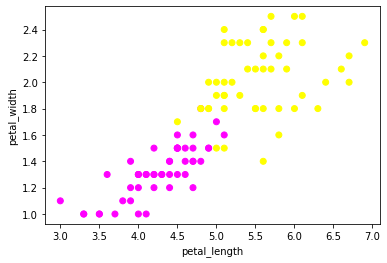

In [35]:
# Extract the petal_length and petal_width of versicolors and virginicas
IrisX = np.hstack([np.ones_like(petal_length), petal_length, petal_width])
IrisX = IrisX[iris.target != 0, :]

# Set versicolor=0 and virginia=1
IrisY = (iris.target[iris.target != 0] - 1).reshape(-1, 1).astype(np.float64)

plt.scatter(IrisX[:, 1], IrisX[:, 2], c=IrisY, cmap="spring")
plt.xlabel("petal_length")
plt.ylabel("petal_width")

[-45.27237188   5.75453487  10.44670958]


(2.805, 7.095000000000001)

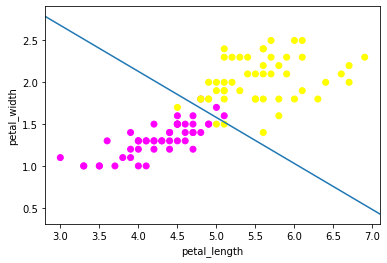

In [36]:
#Utilizing a solver (bfgs)
Theta0 = np.zeros((3, ))
ThetaOpt = sopt.fmin_l_bfgs_b(
    lambda Theta: logistic_regression(Theta, IrisX, IrisY), np.array(Theta0)
)[0]
print(ThetaOpt)

plt.scatter(IrisX[:, 1], IrisX[:, 2], c=IrisY.ravel(), cmap="spring")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
pl_min, pl_max = plt.xlim()
pl = np.linspace(pl_min, pl_max, 1000)
plt.plot(pl, -(ThetaOpt[0] + ThetaOpt[1] * pl) / ThetaOpt[2])
plt.xlim(pl_min, pl_max)